
The data contains information about 1388 customers. It also indicates whether the customer made the purchase or not?

The goal is to create a predictive model which can predict the Customer Purchase Behaviour of a given Customer.


The flow of the project is as below:
* Reading the data in python
* Defining the problem statement
* Identifying the Target variable
* Looking at the distribution of Target variable
* Basic Data exploration
* Rejecting useless columns
* Visual Exploratory Data Analysis for data distribution (Histogram and Barcharts)
* Feature Selection based on data distribution
* Outlier treatment 
* Missing Values treatment
* Visual correlation analysis
* Statistical correlation analysis (Feature Selection)
* Converting data to numeric for ML
* Sampling and K-fold cross validation
* Trying multiple classification algorithms
* Selecting the best Model
* Deploying the best model in production

I know its a long list!! Take a deep breath... and let us get started!

# Reading the data into python
This is one of the most important steps in machine learning! You must understand the data and the domain well before trying to apply any machine learning algorithm.

The data has one file "ConsumerPurchaseData.csv". This file contains 1355 Customer details.

The goal is to learn from this data and predict if a new customer comes  ... will he/she purchase the good or not?

## Data description
The business meaning of each column in the data is as below

* Age: Customers age
* Gender: Customers gender (0: Male, 1: Female)
* Annual Income: Annual income of the customer in dollars
* Number of Purchases: Total number of purchases made by the customer
* Product Category: Category of the purchased product (0: Electronics, 1: Clothing, 2:Home Goods, 3: Beauty, 4: Sports)
* Time Spent on Website: Time spent by the customer on the website in minutes
* Loyalty Program: Whether the customer is a member of the loyalty program (0: No, 1: Yes)
* Discounts Availed: Number of discounts availed by the customer (range: 0-5)
* Purchase Status: Likelihood of the customer making a purchase (0: No, 1: Yes)

In [88]:
# Reading the dataset
import pandas as pd
import numpy as np
ConsumerPurchaseData=pd.read_csv("C:/Users/Siddhali/OneDrive/Desktop/Ankit/IVY/Mentorness/ML Internship/consumer behaviour/customer_purchase_data.csv")
print('Shape before deleting duplicate values:', ConsumerPurchaseData.shape)

# Removing duplicate rows if any
ConsumerPurchaseData=ConsumerPurchaseData.drop_duplicates()
print('Shape After deleting duplicate values:', ConsumerPurchaseData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
ConsumerPurchaseData.head()

Shape before deleting duplicate values: (1500, 9)
Shape After deleting duplicate values: (1388, 9)


,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.26794,8,0,30.568601,0,5,1
1,20,1,23579.77358,4,2,38.240097,0,5,0
2,27,1,127821.30640,11,2,31.633212,1,0,1
3,24,1,137798.62310,19,3,46.167059,0,4,1
4,31,1,99300.96422,19,1,19.823592,0,0,1


Given a dataset containing customer information, including the following variables, develop a 
predictive model to estimate the likelihood of a customer making a purchase

Target Variable:Purchase Status 

# Defining the problem statement: 
#### Create a Predictive model which can tell if a customer will make the purchase or not?
* Target Variable:  Purchase Status=Likelihood of the customer making a purchase (0: No, 1: Yes) Purchase Status: Likelihood of the customer making a purchase (0: No, 1: Yes)
* Predictors: 'Age', 'Gender', 'AnnualIncome', 'NumberOfPurchases', 'ProductCategory',
       'TimeSpentOnWebsite', 'LoyaltyProgram', 'DiscountsAvailed

* Made Purchase=0 Customer Made Purchase
* Made Purchase=1 Customer Made Purchase 

In [89]:
ConsumerPurchaseData.nunique()  

Age                     53
Gender                   2
AnnualIncome          1388
NumberOfPurchases       21
ProductCategory          5
TimeSpentOnWebsite    1388
LoyaltyProgram           2
DiscountsAvailed         6
PurchaseStatus           2
dtype: int64

# Determining the type of Machine Learning
Based on the problem statement you can understand that we need to create a supervised ML classification model, as the target variable is categorical.

# Looking at the distribution of Target variable
* If target variable's distribution is too skewed then the predictive modeling will not be possible.
* Bell curve is desirable but slightly positive skew or negative skew is also fine
* When performing Classification, make sure there is a balance in the the distribution of each class otherwise it impacts the Machine Learning algorithms ability to learn all the classes

<Axes: xlabel='PurchaseStatus'>

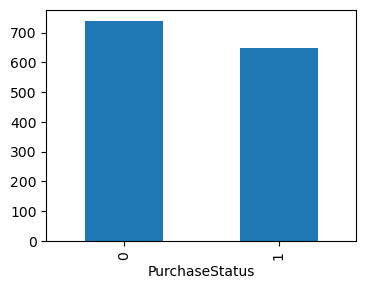

In [90]:
%matplotlib inline
# Creating Bar chart as the Target variable is Categorical
GroupedData=ConsumerPurchaseData.groupby('PurchaseStatus').size() 
GroupedData.plot(kind='bar', figsize=(4,3))   

The data distribution of the target variable is satisfactory to proceed further. There are sufficient number of rows for each category to learn from.

# Basic Data Exploration
There are four commands which are used for Basic data exploration in Python
* <b>head()</b> : This helps to see a few sample rows of the data
* <b>info() </b>: This provides the summarized information of the data
* <b>describe() </b>: This provides the descriptive statistical details of the data
* <b>nunique()</b>: This helps us to identify if a column is categorical or continuous

In [91]:
# Looking at sample rows in the data
ConsumerPurchaseData.head() 

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.26794,8,0,30.568601,0,5,1
1,20,1,23579.77358,4,2,38.240097,0,5,0
2,27,1,127821.30640,11,2,31.633212,1,0,1
3,24,1,137798.62310,19,3,46.167059,0,4,1
4,31,1,99300.96422,19,1,19.823592,0,0,1


In [92]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
ConsumerPurchaseData.info()  

<class 'pandas.core.frame.DataFrame'>
Index: 1388 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1388 non-null   int64  
 1   Gender              1388 non-null   int64  
 2   AnnualIncome        1388 non-null   float64
 3   NumberOfPurchases   1388 non-null   int64  
 4   ProductCategory     1388 non-null   int64  
 5   TimeSpentOnWebsite  1388 non-null   float64
 6   LoyaltyProgram      1388 non-null   int64  
 7   DiscountsAvailed    1388 non-null   int64  
 8   PurchaseStatus      1388 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 108.4 KB


In [93]:
# Looking at the descriptive statistics of the data
ConsumerPurchaseData.describe(include='all') 

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000
mean,43.939481,0.501441,84699.045444,10.548991,2.002882,30.747545,0.333573,2.609510,0.466859
std,15.487533,0.500178,37541.136478,5.869383,1.422851,16.976852,0.471659,1.699984,0.499080
min,18.000000,0.000000,20001.512520,0.000000,0.000000,1.037023,0.000000,0.000000,0.000000
25%,30.750000,0.000000,53766.895807,6.000000,1.000000,16.379635,0.000000,1.000000,0.000000
50%,44.000000,1.000000,84625.292875,11.000000,2.000000,31.213146,0.000000,3.000000,0.000000
75%,57.000000,1.000000,117188.208000,15.000000,3.000000,44.666368,1.000000,4.000000,1.000000
max,70.000000,1.000000,149785.176500,20.000000,4.000000,59.991105,1.000000,5.000000,1.000000


In [94]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
ConsumerPurchaseData.nunique()  

Age                     53
Gender                   2
AnnualIncome          1388
NumberOfPurchases       21
ProductCategory          5
TimeSpentOnWebsite    1388
LoyaltyProgram           2
DiscountsAvailed         6
PurchaseStatus           2
dtype: int64

Categorical Variable="Gender","NumberOfPurchases" , "ProductCategory" , "LoyaltyProgram" ,"DiscountsAvailed", "PurchaseStatus" 

Continous Variable="AnnualIncome" ,"TimeSpentOnWebsite", "Age" 

# Basic Data Exploration Results
Based on the basic exploration above, you can now create a simple report of the data, noting down your 
observations regaring each column. Hence, creating a initial roadmap for further analysis. 

The selected columns in this step are not final, further study will be done and then a final list will be created

* Gender: Accepted, Categorical
* Age: Accepted, Continous 
* Annual Income: Accepted, Continous 
* Number of Purchases: Accepted, Categorical 
* Product Category: Accepted, Categorical
* Time Spent on Website: Accepted, Continous 
* Loyalty Program: Accepted, Categorical
* DiscountsAvailed: Accepted, Categorical
* PurchaseStatus: Accepted, Categorical 

# Removing useless columns from the data

In [95]:
ConsumerPurchaseData.head() 

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.26794,8,0,30.568601,0,5,1
1,20,1,23579.77358,4,2,38.240097,0,5,0
2,27,1,127821.30640,11,2,31.633212,1,0,1
3,24,1,137798.62310,19,3,46.167059,0,4,1
4,31,1,99300.96422,19,1,19.823592,0,0,1


No useless columns in the Data 

# Visual Exploratory Data Analysis
* Categorical variables: Bar plot
* Continuous variables: Histogram

In [96]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber]) 

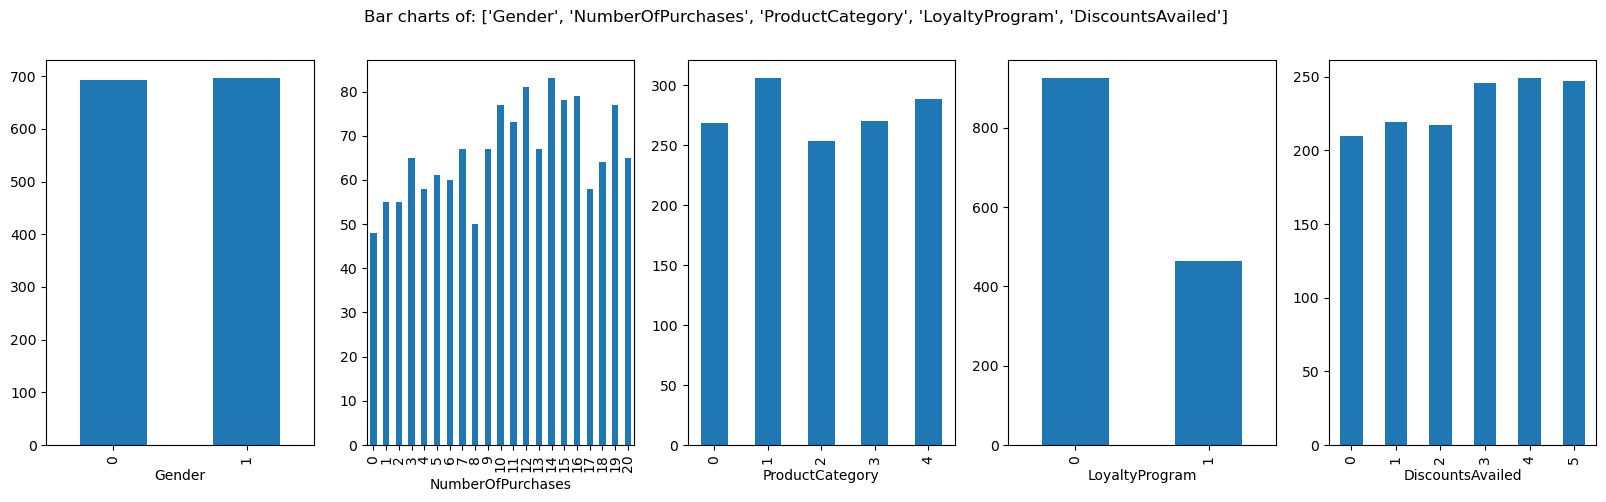

In [97]:
PlotBarCharts(inpData=ConsumerPurchaseData, colsToPlot=["Gender","NumberOfPurchases" , "ProductCategory" , "LoyaltyProgram" ,"DiscountsAvailed"])  

## Treating Imbalance in categorical predictors

No need of treating for Imbalance in categorical predictors

## Bar Charts Interpretation


<b>Selected Categorical Variables</b>: All the categorical variables are selected for further analysis.

"NumberOfPurchases" , "ProductCategory" , "LoyaltyProgram" ,"DiscountsAvailed", "PurchaseStatus" 

### Visualize distribution of all the Continuous Predictor variables in the data using histograms
Based on the Basic Data Exploration, there are two continuous predictor variables 'Age',and 'Fare'

array([[<Axes: title={'center': 'AnnualIncome'}>,
        <Axes: title={'center': 'TimeSpentOnWebsite'}>],
       [<Axes: title={'center': 'Age'}>, <Axes: >]], dtype=object)

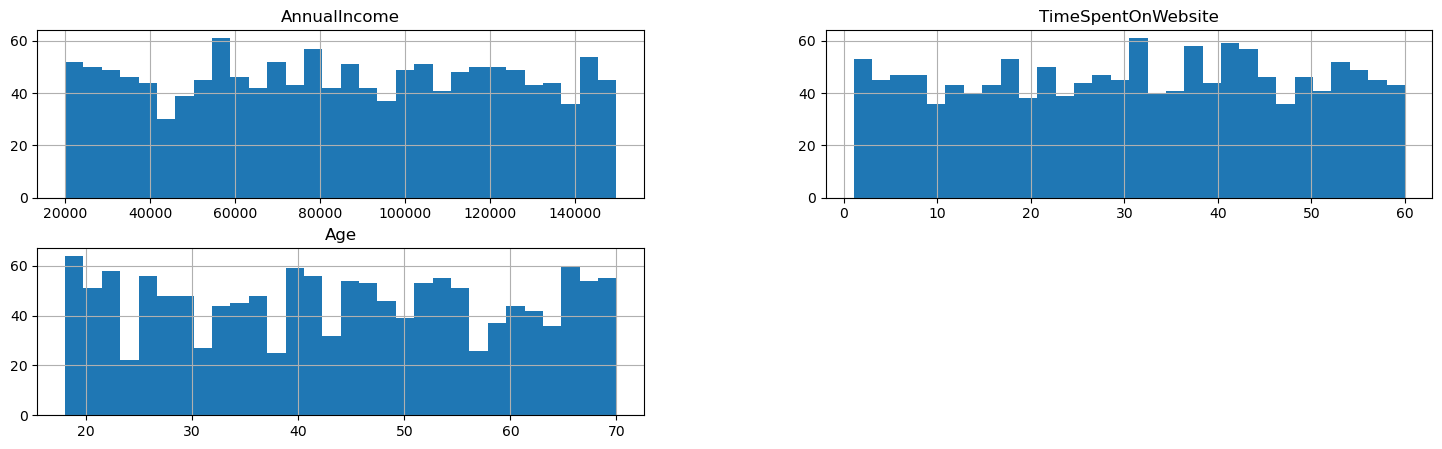

In [98]:
# Plotting histograms of multiple columns together
# Observe that Fare has outliers
ConsumerPurchaseData.hist(["AnnualIncome" ,"TimeSpentOnWebsite", "Age"], figsize=(18,5),bins=30)   

## Histogram Interpretation

<b>Selected Continuous Variables:</b>
* <b>Age</b> : Selected. 
* <b>TimeSpentOnWebsite</b>: Selected.
* <b>AnnualIncome</b>: Selected. 

# Outlier treatment
No need for outlier treatment

# Missing values treatment
No need of missing values treatment 

# Feature Selection
Now its time to finally choose the best columns(Features) which are correlated to the Target variable.
This can be done directly by measuring the correlation values or ANOVA/Chi-Square tests. However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data.

I have listed below the techniques used for visualizing relationship between two variables as well as measuring the strength statistically.

## Visual exploration of relationship between variables
* Continuous Vs Continuous ---- Scatter Plot
* Categorical Vs Continuous---- Box Plot
* Categorical Vs Categorical---- Grouped Bar Plots

## Statistical measurement of relationship strength between variables
* Continuous Vs Continuous ---- Correlation matrix
* Categorical Vs Continuous---- ANOVA test
* Categorical Vs Categorical--- Chi-Square test

In this project the Target variable is categorical, hence below two scenarios will be present
* Categorical Target Variable Vs Continuous Predictor
* Categorical Target Variable Vs Categorical Predictor

# Relationship exploration: Categorical Vs Continuous Visual Analysis by using Box Plots
When the target variable is Categorical and the predictor variable is Continuous we analyze the relation using bar plots/Boxplots and measure the strength of relation using Anova test

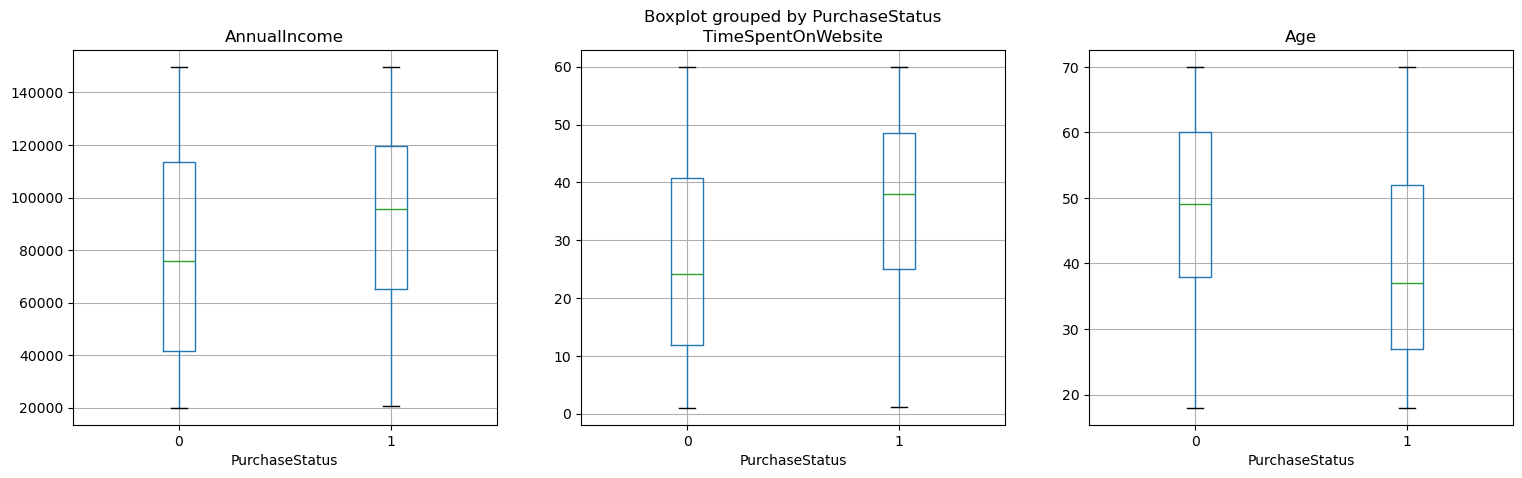

In [99]:
# Box plots for Categorical Target Variable "Survived" and continuous predictors
ContinuousColsList=["AnnualIncome" ,"TimeSpentOnWebsite", "Age"]

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "Survived"
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    ConsumerPurchaseData.boxplot(column=PredictorCol, by='PurchaseStatus', figsize=(5,5), vert=True, ax=PlotCanvas[i]) 

# Box-Plots interpretation
<b>What should you look for in these box plots? </b>

These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

The other chart exhibit opposite characteristics. Means the the data distribution is different(the boxes are not in same line!) for each category of purchase behaviour. It hints that these variables might be correlated with Purchase Status. 

We confirm this by looking at the results of ANOVA test below

# Statistical Feature Selection (Categorical Vs Continuous) Statistical Analysis using ANOVA test
Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable
* Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Predictor variable is same for all the groups in the categorical Target variable)
* ANOVA Test result: Probability of H0 being true

In [100]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors) 

In [101]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=["AnnualIncome" ,"TimeSpentOnWebsite", "Age"] 
FunctionAnova(inpData=ConsumerPurchaseData, TargetVariable='PurchaseStatus', ContinuousPredictorList=ContinuousVariables)  

##### ANOVA Results ##### 

AnnualIncome is correlated with PurchaseStatus | P-Value: 6.771032032490806e-13
TimeSpentOnWebsite is correlated with PurchaseStatus | P-Value: 8.205673067822116e-27
Age is correlated with PurchaseStatus | P-Value: 8.246327051627856e-22


['AnnualIncome', 'TimeSpentOnWebsite', 'Age']

The results of ANOVA confirm our visual analysis using box plots above.

<b>Final selected Continuous columns:</b>

'AnnualIncome', 'TimeSpentOnWebsite', 'Age'

# Relationship exploration: Categorical Vs Categorical Visual Analysis by using Grouped Bar Charts
When the target variable is Categorical and the predictor is also Categorical then we explore the correlation between them  visually using barplots and statistically using Chi-square test

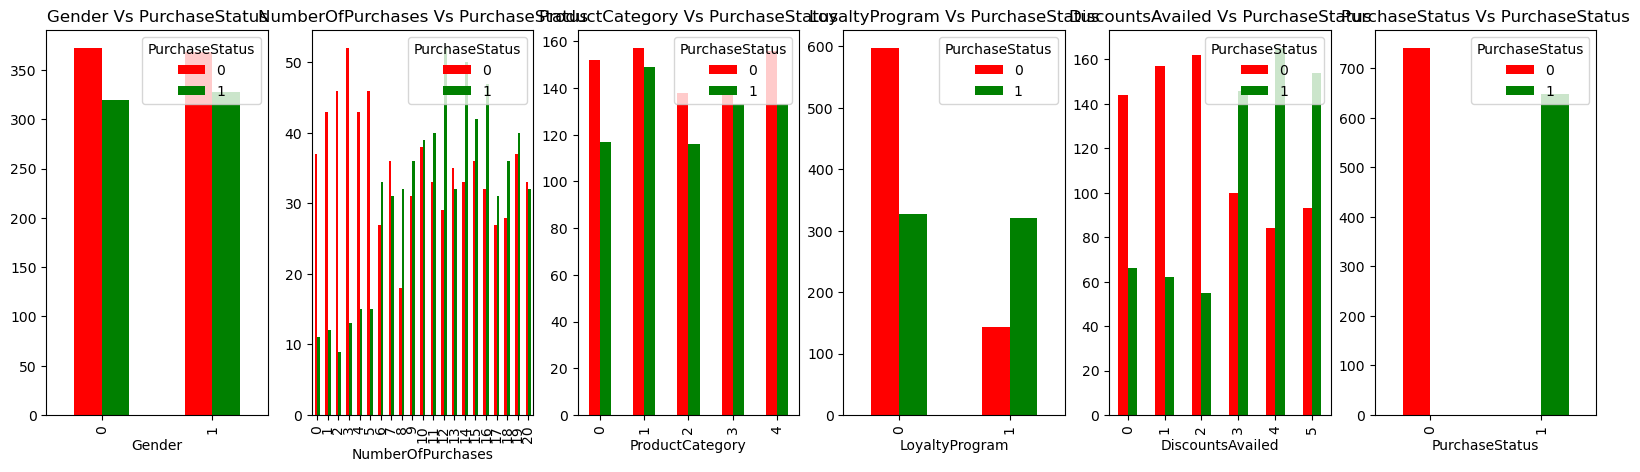

In [102]:
# Visual Inference using Grouped Bar charts
CategoricalColsList=["Gender","NumberOfPurchases" , "ProductCategory" , "LoyaltyProgram" ,"DiscountsAvailed", "PurchaseStatus" ]

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList) , figsize=(20,5))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "Survived"
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=ConsumerPurchaseData[CategoricalCol], columns=ConsumerPurchaseData['PurchaseStatus']) 
    CrossTabResult.plot.bar(color=['red','green'], ax=PlotCanvas[i], title=CategoricalCol+' Vs '+'PurchaseStatus') 

### Statistical Feature Selection (Categorical Vs Categorical) Statistical Analysis using Chi-Square Test

Chi-Square test is conducted to check the correlation between two categorical variables

* Assumption(H0): The two columns are NOT related to each other
* Result of Chi-Sq Test: The Probability of H0 being True

In [103]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [104]:
CategoricalVariables=["Gender","NumberOfPurchases" , "ProductCategory" , "LoyaltyProgram" ,"DiscountsAvailed" ] 

# Calling the function
FunctionChisq(inpData=ConsumerPurchaseData, 
              TargetVariable='PurchaseStatus',
              CategoricalVariablesList= CategoricalVariables) 

Gender is NOT correlated with PurchaseStatus | P-Value: 0.7824413702843654
NumberOfPurchases is correlated with PurchaseStatus | P-Value: 4.376363896986479e-17
ProductCategory is NOT correlated with PurchaseStatus | P-Value: 0.6498094447776568
LoyaltyProgram is correlated with PurchaseStatus | P-Value: 4.2662142351931434e-32
DiscountsAvailed is correlated with PurchaseStatus | P-Value: 2.3766327988424066e-34


['NumberOfPurchases', 'LoyaltyProgram', 'DiscountsAvailed']

<b>Finally selected Categorical variables:</b>

'NumberOfPurchases', 'LoyaltyProgram', 'DiscountsAvailed', 'PurchaseStatus' 

# Selecting final predictors for Machine Learning
Based on the above tests, selecting the final columns for machine learning

In [105]:
SelectedColumns=["NumberOfPurchases" , "ProductCategory" , "LoyaltyProgram" ,"DiscountsAvailed", "AnnualIncome" ,"TimeSpentOnWebsite", "Age","PurchaseStatus"]

# Selecting final columns
DataForML=ConsumerPurchaseData[SelectedColumns]
DataForML.head() 

,NumberOfPurchases,ProductCategory,LoyaltyProgram,DiscountsAvailed,AnnualIncome,TimeSpentOnWebsite,Age,PurchaseStatus
0,8,0,0,5,66120.26794,30.568601,40,1
1,4,2,0,5,23579.77358,38.240097,20,0
2,11,2,1,0,127821.30640,31.633212,27,1
3,19,3,0,4,137798.62310,46.167059,24,1
4,19,1,0,0,99300.96422,19.823592,31,1


In [106]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl') 

In this data there is no Ordinal categorical variable.

# Machine Learning: Splitting the data into Training and Testing sample
We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [107]:
DataForML_Numeric=DataForML

In [108]:
DataForML_Numeric.head()

,NumberOfPurchases,ProductCategory,LoyaltyProgram,DiscountsAvailed,AnnualIncome,TimeSpentOnWebsite,Age,PurchaseStatus
0,8,0,0,5,66120.26794,30.568601,40,1
1,4,2,0,5,23579.77358,38.240097,20,0
2,11,2,1,0,127821.30640,31.633212,27,1
3,19,3,0,4,137798.62310,46.167059,24,1
4,19,1,0,0,99300.96422,19.823592,31,1


In [109]:
DataForML_Numeric.drop("PurchaseStatus",inplace=True,axis=1)    

C:\Users\Siddhali\AppData\Local\Temp\ipykernel_22524\1866927694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataForML_Numeric.drop("PurchaseStatus",inplace=True,axis=1)


In [110]:
DataForML_Numeric.head() 

,NumberOfPurchases,ProductCategory,LoyaltyProgram,DiscountsAvailed,AnnualIncome,TimeSpentOnWebsite,Age
0,8,0,0,5,66120.26794,30.568601,40
1,4,2,0,5,23579.77358,38.240097,20
2,11,2,1,0,127821.30640,31.633212,27
3,19,3,0,4,137798.62310,46.167059,24
4,19,1,0,0,99300.96422,19.823592,31


In [111]:
DataForML['PurchaseStatus'] = ConsumerPurchaseData['PurchaseStatus'] 


C:\Users\Siddhali\AppData\Local\Temp\ipykernel_22524\2410543564.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataForML['PurchaseStatus'] = ConsumerPurchaseData['PurchaseStatus']


In [112]:
DataForML_Numeric 

,NumberOfPurchases,ProductCategory,LoyaltyProgram,DiscountsAvailed,AnnualIncome,TimeSpentOnWebsite,Age,PurchaseStatus
0,8,0,0,5,66120.26794,30.568601,40,1
1,4,2,0,5,23579.77358,38.240097,20,0
2,11,2,1,0,127821.30640,31.633212,27,1
3,19,3,0,4,137798.62310,46.167059,24,1
4,19,1,0,0,99300.96422,19.823592,31,1
...,...,...,...,...,...,...,...,...
1495,13,0,0,5,65048.14183,34.590743,39,1
1496,18,2,0,1,28775.33107,17.625707,67,1
1497,7,4,0,0,57363.24754,12.206033,40,0
1498,16,2,1,0,134021.77550,37.311634,63,1


In [113]:
# Separate Target Variable and Predictor Variables
TargetVariable='PurchaseStatus' 
Predictors=['NumberOfPurchases', 'LoyaltyProgram', 'DiscountsAvailed','Age',  'TimeSpentOnWebsite', 'AnnualIncome'] 

# Demonstration for deployment with final cols
#Predictors=['Pclass', 'Sex','Fare']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values 

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=428)

In [114]:
X_train[0:4]

array([[1.70000000e+01, 0.00000000e+00, 3.00000000e+00, 6.90000000e+01,
        3.32767165e+01, 9.61624225e+04],
       [1.40000000e+01, 1.00000000e+00, 4.00000000e+00, 2.90000000e+01,
        4.96896713e+01, 3.80955712e+04],
       [2.00000000e+01, 1.00000000e+00, 0.00000000e+00, 2.20000000e+01,
        2.28472909e+01, 6.94673023e+04],
       [5.00000000e+00, 0.00000000e+00, 5.00000000e+00, 3.00000000e+01,
        1.06533728e+01, 8.57091653e+04]])

In [115]:
y_train[0:4] 

array([1, 1, 1, 0], dtype=int64)

# Standardization/Normalization of data
You can choose not to run this step if you want to compare the resultant accuracy of this transformation with the accuracy of raw data. 

However, if you are using KNN or Neural Networks, then this step becomes necessary.

In [116]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
# Finding and storing Min and Max values for every column in X
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [117]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape) 
print(X_test.shape)
print(y_test.shape)

(971, 6)
(971,)
(417, 6)
(417,)


In [118]:
X_train[0:4]

array([[1.        , 0.        , 1.        , 0.17307692, 0.85879288,
        0.54514953],
       [0.8       , 0.        , 0.4       , 0.73076923, 0.97292338,
        0.98530696],
       [0.6       , 1.        , 0.6       , 0.23076923, 0.76907878,
        0.01756997],
       [0.1       , 0.        , 0.4       , 1.        , 0.78170986,
        0.36891181]])

In [119]:
# Inverse transform will bring back the original scale
print(PredictorScalerFit.inverse_transform(X)[0:4])  

[[8.00000000e+00 0.00000000e+00 5.00000000e+00 4.00000000e+01
  3.05686012e+01 6.61202679e+04]
 [4.00000000e+00 0.00000000e+00 5.00000000e+00 2.00000000e+01
  3.82400966e+01 2.35797736e+04]
 [1.10000000e+01 1.00000000e+00 0.00000000e+00 2.70000000e+01
  3.16332115e+01 1.27821306e+05]
 [1.90000000e+01 0.00000000e+00 4.00000000e+00 2.40000000e+01
  4.61670588e+01 1.37798623e+05]]


# Logistic Regression

In [120]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=5,penalty='l2', solver='newton-cg') 

# Printing all the parameters of logistic regression
# print(clf) 

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X , y, cv=5, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2)) 

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       213
           1       0.84      0.82      0.83       204

    accuracy                           0.83       417
   macro avg       0.83      0.83      0.83       417
weighted avg       0.83      0.83      0.83       417

[[180  33]
 [ 36 168]]
Accuracy of the model on Testing Sample Data: 0.83

Accuracy values for 10-fold Cross Validation:
 [0.798183   0.82746356 0.81294964 0.81174083 0.81592785]

Final Average Accuracy of the model: 0.81


# Decision Trees

DecisionTreeClassifier(criterion='entropy', max_depth=5)
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       213
           1       0.88      0.86      0.87       204

    accuracy                           0.87       417
   macro avg       0.87      0.87      0.87       417
weighted avg       0.87      0.87      0.87       417

[[188  25]
 [ 29 175]]
Accuracy of the model on Testing Sample Data: 0.87

Accuracy values for 10-fold Cross Validation:
 [0.89213116 0.89219818 0.88476019 0.84054822 0.8809412 ]

Final Average Accuracy of the model: 0.88


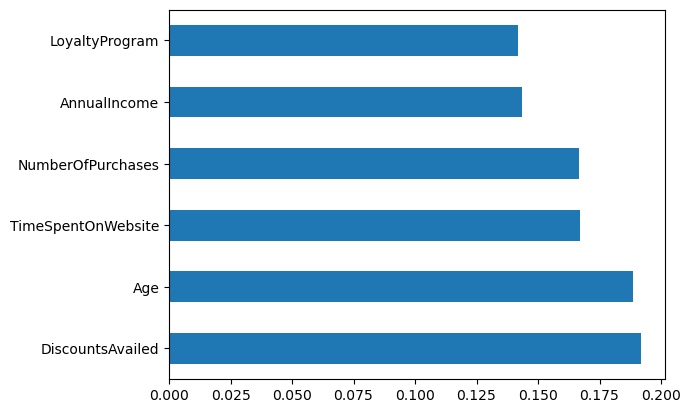

In [121]:
#Decision Trees
from sklearn import tree
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=5,criterion='entropy')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DTree, X , y, cv=5, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2)) 

### Plotting a Decision Tree

In [122]:
# Adding graphviz path to the PATH env variable
# Try to find "dot.exe" in your system and provide the path of that folder
import os
os.environ["PATH"] += os.pathsep + 'C:\\Users\\fhashmi\\AppData\\Local\\Continuum\\Anaconda3\\Library\\bin\\graphviz' 

digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="TimeSpentOnWebsite <= 0.493\nentropy = 0.995\nsamples = 971\nvalue = [527, 444]\nclass = 0"] ;
1 [label="LoyaltyProgram <= 0.5\nentropy = 0.84\nsamples = 461\nvalue = [337, 124]\nclass = 0"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="DiscountsAvailed <= 0.5\nentropy = 0.637\nsamples = 310\nvalue = [260, 50]\nclass = 0"] ;
1 -> 2 ;
3 [label="NumberOfPurchases <= 0.875\nentropy = 0.221\nsamples = 141\nvalue = [136, 5]\nclass = 0"] ;
2 -> 3 ;
4 [label="AnnualIncome <= 0.838\nentropy = 0.071\nsamples = 118\nvalue = [117, 1]\nclass = 0"] ;
3 -> 4 ;
5 [label="entropy = 0.0\nsamples = 98\nvalue = [98, 0]\nclass = 0"] ;
4 -> 5 ;
6 [label="entropy = 0.286\nsamples = 20\nvalue = [19, 1]\nclass = 0"] ;
4 -> 6 ;
7 [label="AnnualIncome <= 0.069\nentropy = 0.667\nsamples = 23\nvalue = [19, 4]\nclass = 0"] ;
3 -> 7 ;
8 [label="entropy = 0.918\nsamples = 3\nvalue = [1, 2]\ncla

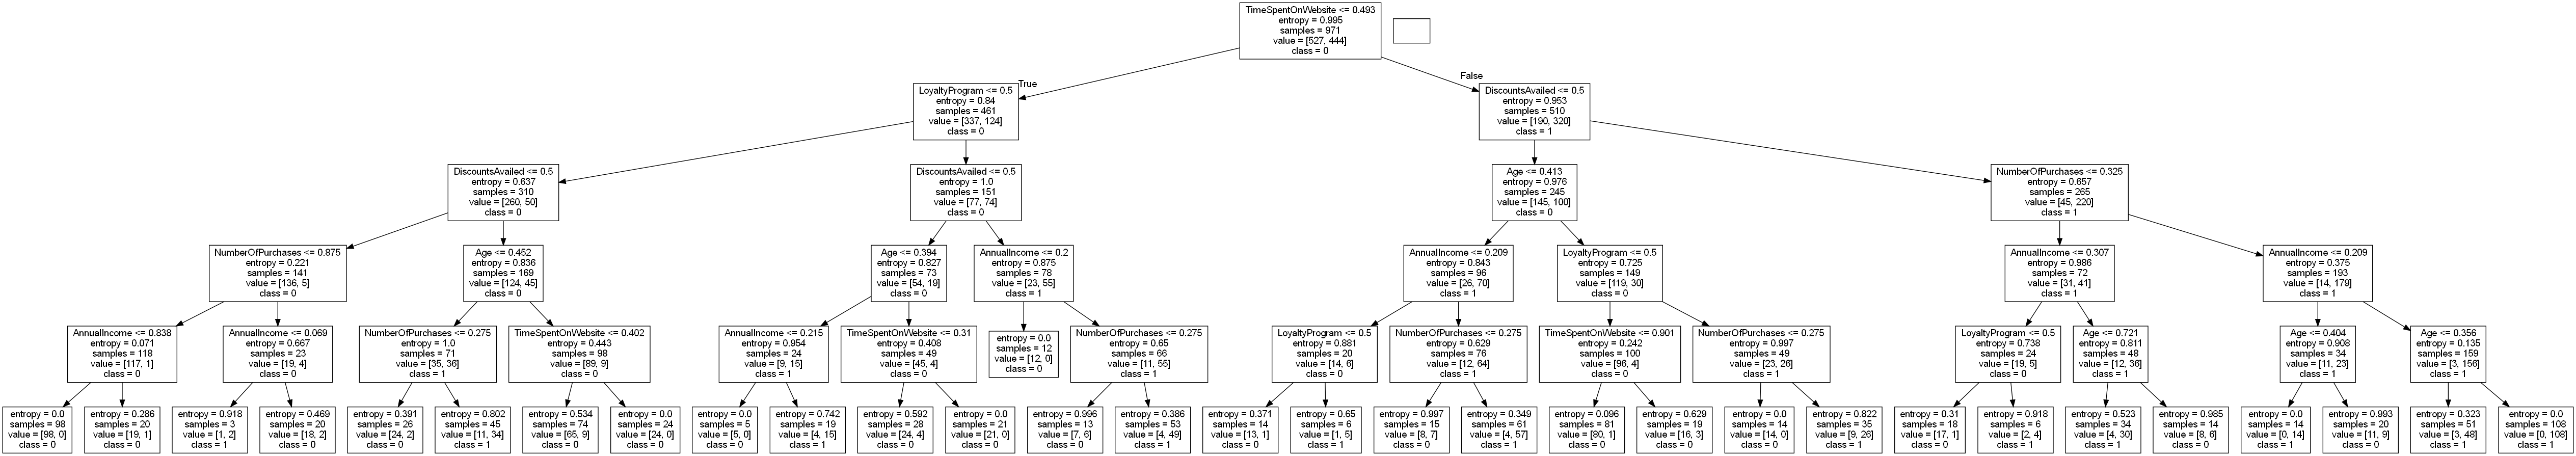

In [124]:
# Load libraries
from IPython.display import Image

import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(DTree, out_file=None, 
                                feature_names=Predictors, class_names=['0','1'])
# printing the rules
print(dot_data)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=1500,height=1500)
# Double click on the graph to zoom in